# Data Cleaning

We load in the relevant files for inspection and carry out a number of data manipulations, visualisations and processes to understand and analyse our data before proceeding with the clustering algorithm. We also format our data into a single source for our clustering algorithm.

## Importing required libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Data Import

Our data is split across 12 files.
These are split into trials of length 95, length 100 and length 150.
The wi_95 file contains all wins from the 95 trials for each subject, lo_95 contains the losses, index_95 contains which study each subject relates to and choice_95 details what deck each subject chose across each trial.

These files contain data from 617 healthy subjects who have participated in the Iowa Gambling Task. These participants are split accross 10 independant studies with a variety of participants and length of trial:

| Study              | Participants | Trials |
| :--                | ------------ | ------ |
| Fridberg et al.	 |  15          |      95|	
| Horstmannb         | 162          |     100|	
| Kjome et al.	     |  19	        |     100|	
| Maia & McClelland  |  40	        |     100|		
| Premkumar et al. 	 |  25	        |     100|	
| Steingroever et al.| 70	        |     100|	
| Steingroever et al.| 57	        |     150|	
| Wetzels et al. 	 | 41	        |     150|
| Wood et al.	     |153	        |     100|	
| Worthy et al.      | 35           |     100|

In [221]:
#import raw data into dataframes
wi_95 = pd.read_csv('../data/wi_95.csv')
wi_100 = pd.read_csv('../data/wi_100.csv')
wi_150 = pd.read_csv('../data/wi_150.csv')
lo_95 = pd.read_csv('../data/lo_95.csv')
lo_100 = pd.read_csv('../data/lo_100.csv')
lo_150 = pd.read_csv('../data/lo_150.csv')
index_95 = pd.read_csv('../data/index_95.csv')
index_100 = pd.read_csv('../data/index_100.csv')
index_150 = pd.read_csv('../data/index_150.csv')
choice_95 = pd.read_csv('../data/choice_95.csv')
choice_100 = pd.read_csv('../data/choice_100.csv')
choice_150 = pd.read_csv('../data/choice_150.csv')

## Inspection of the raw data

We display the wins, losses, index and choices for the trials of length 95 to understand the current format of the data

In [222]:
#Display wins
wi_95.head()

Wins_1  Wins_2  Wins_3  Wins_4  Wins_5  Wins_6  Wins_7  Wins_8  \
Subj_1     100     100     100     100     100     100     100     100   
Subj_2     100     100      50     100     100     100     100     100   
Subj_3      50      50      50     100     100     100     100     100   
Subj_4      50      50     100     100     100     100     100      50   
Subj_5     100     100      50      50      50     100     100     100   

        Wins_9  Wins_10  ...  Wins_86  Wins_87  Wins_88  Wins_89  Wins_90  \
Subj_1     100      100  ...       50       50       50       50       50   
Subj_2     100      100  ...       50      100      100      100      100   
Subj_3     100      100  ...      100      100      100       50       50   
Subj_4     100      100  ...      100       50       50       50       50   
Subj_5     100      100  ...       50       50       50       50       50   

        Wins_91  Wins_92  Wins_93  Wins_94  Wins_95  
Subj_1       50       50       50       50       50  
Subj_2      100       50       50       50       50  
Subj_3       50       50       50       50       50  
Subj_4       50       50       50       50       50  
Subj_5       50       50       50       50       50  

[5 rows x 95 columns]

In [223]:
#Display losses
lo_95.head()

Losses_1  Losses_2  Losses_3  Losses_4  Losses_5  Losses_6  Losses_7  \
Subj_1         0         0         0         0         0         0         0   
Subj_2         0         0         0         0         0         0         0   
Subj_3         0         0         0         0         0         0         0   
Subj_4         0         0         0         0      -150         0         0   
Subj_5         0         0         0         0         0         0      -150   

        Losses_8  Losses_9  Losses_10  ...  Losses_86  Losses_87  Losses_88  \
Subj_1         0     -1250          0  ...          0          0          0   
Subj_2         0         0          0  ...        -50       -300          0   
Subj_3      -150         0          0  ...          0          0          0   
Subj_4         0         0          0  ...          0        -50          0   
Subj_5         0         0          0  ...        -75          0          0   

        Losses_89  Losses_90  Losses_91  Losses_92  Losses_93  Losses_94  \
Subj_1          0          0          0          0       -250          0   
Subj_2       -350          0          0          0          0          0   
Subj_3          0          0          0       -250          0          0   
Subj_4        -50        -50          0        -25          0          0   
Subj_5          0          0          0          0          0          0   

        Losses_95  
Subj_1          0  
Subj_2        -25  
Subj_3          0  
Subj_4          0  
Subj_5          0  

[5 rows x 95 columns]

In [224]:
#Display index
index_95.head()

Subj     Study
0     1  Fridberg
1     2  Fridberg
2     3  Fridberg
3     4  Fridberg
4     5  Fridberg

In [225]:
#Display choices
choice_95.head()

Choice_1  Choice_2  Choice_3  Choice_4  Choice_5  Choice_6  Choice_7  \
Subj_1         2         2         2         2         2         2         2   
Subj_2         1         2         3         2         2         2         2   
Subj_3         3         4         3         2         2         1         1   
Subj_4         4         3         1         1         1         2         2   
Subj_5         1         2         3         4         3         1         1   

        Choice_8  Choice_9  Choice_10  ...  Choice_86  Choice_87  Choice_88  \
Subj_1         2         2          1  ...          4          4          4   
Subj_2         2         2          2  ...          3          1          1   
Subj_3         1         1          2  ...          2          2          2   
Subj_4         3         2          2  ...          2          3          3   
Subj_5         2         2          2  ...          3          3          4   

        Choice_89  Choice_90  Choice_91  Choice_92  Choice_93  Choice_94  \
Subj_1          4          4          4          4          4          4   
Subj_2          1          2          2          3          4          4   
Subj_3          4          4          4          4          4          4   
Subj_4          3          3          3          3          4          4   
Subj_5          4          3          4          4          4          4   

        Choice_95  
Subj_1          4  
Subj_2          3  
Subj_3          4  
Subj_4          4  
Subj_5          4  

[5 rows x 95 columns]

# Data manipulations

We want to consolidate the data into a single dataframe with certain features. The first step is to aggregate the choices for all subjects into single columns for each card deck.

In [226]:
#Count values for each choice by deck
agg_choice_95 = choice_95.apply(pd.Series.value_counts, axis=1)

agg_choice_100 = choice_100.apply(pd.Series.value_counts, axis=1)

agg_choice_150 = choice_150.apply(pd.Series.value_counts, axis=1)

In [227]:
#Display aggregated choice data
agg_choice_95.head()

1   2   3   4
Subj_1  12   9   3  71
Subj_2  24  26  12  33
Subj_3  12  35  10  38
Subj_4  11  34  12  38
Subj_5  10  24  15  46

We add columns labelled with the total wins and total losses for each subject calculated from the wins and losses raw data we previously imported

In [228]:
#calculate total wins and total losses for each subject
agg_choice_95["tot_win"] = wi_95.sum(axis=1)
agg_choice_95["tot_los"] = lo_95.sum(axis=1)

agg_choice_100["tot_win"] = wi_100.sum(axis=1)
agg_choice_100["tot_los"] = lo_100.sum(axis=1)

agg_choice_150["tot_win"] = wi_150.sum(axis=1)
agg_choice_150["tot_los"] = lo_150.sum(axis=1)

#resetting index for concatination in the next cell
agg_choice_95.reset_index(inplace=True)
agg_choice_100.reset_index(inplace=True)
agg_choice_150.reset_index(inplace=True)

We then add the index dataframe so as to know which Study each subject is from which will aid with our analysis and visualisations later on

In [229]:
agg_choice_95.head()

index   1   2   3   4  tot_win  tot_los
0  Subj_1  12   9   3  71     5800    -4650
1  Subj_2  24  26  12  33     7250    -7925
2  Subj_3  12  35  10  38     7100    -7850
3  Subj_4  11  34  12  38     7000    -7525
4  Subj_5  10  24  15  46     6450    -6350

In [230]:
#Concatenate index to identify the study
final_95 = pd.concat([agg_choice_95, index_95], axis=1)
final_100 = pd.concat([agg_choice_100, index_100], axis=1)
final_150 = pd.concat([agg_choice_150, index_150], axis=1)

In [231]:
final_95.head()

index   1   2   3   4  tot_win  tot_los  Subj     Study
0  Subj_1  12   9   3  71     5800    -4650     1  Fridberg
1  Subj_2  24  26  12  33     7250    -7925     2  Fridberg
2  Subj_3  12  35  10  38     7100    -7850     3  Fridberg
3  Subj_4  11  34  12  38     7000    -7525     4  Fridberg
4  Subj_5  10  24  15  46     6450    -6350     5  Fridberg

We inspect the new dataframes to see if our aggregation has created any null values

In [232]:
#Display summary info for our data types accross the three dataframes we have created
final_95.info()
final_100.info()
final_150.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    15 non-null     object
 1   1        15 non-null     int64 
 2   2        15 non-null     int64 
 3   3        15 non-null     int64 
 4   4        15 non-null     int64 
 5   tot_win  15 non-null     int64 
 6   tot_los  15 non-null     int64 
 7   Subj     15 non-null     int64 
 8   Study    15 non-null     object
dtypes: int64(7), object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    504 non-null    object
 1   1        504 non-null    int64 
 2   2        504 non-null    int64 
 3   3        504 non-null    int64 
 4   4        504 non-null    int64 
 5   tot_win  504 non-null    int64 
 6   tot_los  504 non-null    int64 
 7  

This has shown the presence of six null values within the final_150 dataframe. Further inspection of these null values may show us an insight into some participants choices in this task

In [233]:
sample = final_150[final_150[1].isnull()]
sample.head(2)

index   1   2      3   4  tot_win  tot_los  Subj             Study
7    Subj_8 NaN NaN  150.0 NaN     7500    -3750     8  Steingroever2011
56  Subj_57 NaN NaN  150.0 NaN     7500    -3750    57  Steingroever2011

## Note

Interestingly this step has shown that two participants, both from the Steingroever2011 study chose deck 3 for 150 consecutive trials. It would be interesting to know whether this was a tactical choice with prior knowledge of how the Iowa gambling task is set up - i.e. with decks 3 and 4 giving the best returns. This may have also been a tactic to quickly finish the game from a participant who was uninterested in the game itself. Either way this slightly varies from the expected results of the Iowa Gambling task in which we expect subjects to show a variety of choices but ultimately learn which of the decks are more rewarding.

We replace these cells marked as Null with 0 across the data

In [234]:
#replace all NaN values with '0'
final_150[1] = final_150[1].fillna(0)
final_150[2] = final_150[2].fillna(0)
final_150[4] = final_150[4].fillna(0)

We change all columns to type int from type float

In [235]:
#convert float to int
final_150[1] = final_150[1].astype(int)
final_150[2] = final_150[2].astype(int)
final_150[3] = final_150[3].astype(int)
final_150[4] = final_150[4].astype(int)

We then bring all three dataframes together into a single dataframe named 'final'. This is comprised of:

- Trials of length 95
- Trials of length 100
- Trials of length 150

We can then do manipulations across all of this data all at once

In [236]:
#creation of a single dataframe with all 617 subjects accross all studies
temp = final_95.append(final_100)
final = temp.append(final_150)
final

index   1    2   3   4  tot_win  tot_los  Subj     Study
0    Subj_1  12    9   3  71     5800    -4650     1  Fridberg
1    Subj_2  24   26  12  33     7250    -7925     2  Fridberg
2    Subj_3  12   35  10  38     7100    -7850     3  Fridberg
3    Subj_4  11   34  12  38     7000    -7525     4  Fridberg
4    Subj_5  10   24  15  46     6450    -6350     5  Fridberg
..      ...  ..  ...  ..  ..      ...      ...   ...       ...
93  Subj_94  24   69  13  44    12150   -11850    94   Wetzels
94  Subj_95   5   31  46  68     9300    -7150    95   Wetzels
95  Subj_96  18   19  37  76     9350    -7900    96   Wetzels
96  Subj_97  25   30  44  51    10250    -9050    97   Wetzels
97  Subj_98  11  104   6  29    13250   -15050    98   Wetzels

[617 rows x 9 columns]

As can be seen from the above output - the dataframe contains 617 rows (one for each of the the participants). However we dont have a unique identifier for each subject. We also have the issue that there is Subject 1 for each of the three length trials data. We add a column with a unique ID for each of the 617 participants to overcome this issue. We also calculate the balance for each participant after the completion of their trials which is the total wins added to the total losses.

$$wins + losses = balance$$

In [237]:
#calculate balance and add Unique ID for participants
final['Unique_ID'] = (np.arange(len(final))+1)
final["balance"] = final["tot_win"] + final["tot_los"]

final = final.rename(columns={1:'Deck_A', 2:'Deck_B', 3:'Deck_C', 4:'Deck_D'})
final

index  Deck_A  Deck_B  Deck_C  Deck_D  tot_win  tot_los  Subj     Study  \
0    Subj_1      12       9       3      71     5800    -4650     1  Fridberg   
1    Subj_2      24      26      12      33     7250    -7925     2  Fridberg   
2    Subj_3      12      35      10      38     7100    -7850     3  Fridberg   
3    Subj_4      11      34      12      38     7000    -7525     4  Fridberg   
4    Subj_5      10      24      15      46     6450    -6350     5  Fridberg   
..      ...     ...     ...     ...     ...      ...      ...   ...       ...   
93  Subj_94      24      69      13      44    12150   -11850    94   Wetzels   
94  Subj_95       5      31      46      68     9300    -7150    95   Wetzels   
95  Subj_96      18      19      37      76     9350    -7900    96   Wetzels   
96  Subj_97      25      30      44      51    10250    -9050    97   Wetzels   
97  Subj_98      11     104       6      29    13250   -15050    98   Wetzels   

    Unique_ID  balance  
0           1     1150  
1           2     -675  
2           3     -750  
3           4     -525  
4           5      100  
..        ...      ...  
93        613      300  
94        614     2150  
95        615     1450  
96        616     1200  
97        617    -1800  

[617 rows x 11 columns]

## Add Payoff to Dataframe

We are interested in the payoffs used in the various trials for the Iowa Gambling task study. There were three different kinds of payoff used in all the studies.

#### Payoff 1
This scheme gives +250 result from 10 choices of the good decks (C&D) while giving a -250 result from 10 choices of the bad decks (A&B). Payoff 1 also has a feature in which decks A&C result in frequent losses while decks B&D result in infrequent losses. Another feature of payoff 1 is that deck C has varialble loss between -25, -50 or -75. The final feature of Payoff 1 is that wins and losses are in a fixed sequence

#### Payoff 2
Payoff 2 is a variant on the first payoff with a number of changes. The first is that the loss from Deck C is constant at -50. The second change involves a random sequence of wins and losses through the trials.

#### Payoff 3
Payoff 3 is another variety which still contains the base feature of bad decks A&B and good decks C&D with A&C having frequent losses and B&D having infrequent losses. This scheme differs by having decks that change every 10 trials. This means the bad decks (A&B) produce a -250 result from 10 trials at the start but this decreases by 150 for every 10 trials resulting in a final result of -1000 for 10 card chosen fromn the bad decks. Similarly the good decks start with a +250 result and increase by 25 with every 10 trials finishing with a reward of 375 for every 10 trials. This means both choices are magnified as the trials progress but also the punishment for choosing a bad deck increases far more than the reward for choosing a good deck. The final feature of payoff scheme 3 is that there is a difference in wins between decks and the sequence of wins and losses is fixed.

This variety in reward/punishment from payoff to payoff is an interesting factor in the outcomes of our project and so we will further explore how much of an impact this variety has within our clustering analysis.

In [238]:
#payoff data
data = [['Fridberg', 1],['Horstmann', 2],['Kjome', 3],['Maia', 1],['SteingroverInPrep', 2],['Premkumar', 3],['Wood', 3],['Worthy', 1],['Steingroever2011', 2],['Wetzels', 2]]
 
# Create the pandas DataFrame
payoff = pd.DataFrame(data, columns = ['Study', 'Payoff'])
 
# print dataframe.
payoff


Study  Payoff
0           Fridberg       1
1          Horstmann       2
2              Kjome       3
3               Maia       1
4  SteingroverInPrep       2
5          Premkumar       3
6               Wood       3
7             Worthy       1
8   Steingroever2011       2
9            Wetzels       2

We join the final dataframe with the dataframe containing the payoff values

In [239]:
final = final.join(payoff.set_index('Study'), on='Study')

## Export data

This final dataframe is in the appropriate format for clustering and for some initial visualisations and analysis. We export the data for use in the clustering notebook and then proceed with our exploration.

In [240]:
final.to_csv('../data/cleaned_data.csv')

## Exploration of the data

We want to further understand the data set to see if there are any insights or trends that we can explore during our clustering. A number of methods and graphs can help us to understand the make up of this data and what questions we want to answer within this project.

In [241]:
final.describe()

Deck_A      Deck_B      Deck_C      Deck_D       tot_win  \
count  617.000000  617.000000  617.000000  617.000000    617.000000   
mean    15.813614   33.388979   26.320908   32.296596   8087.252836   
std      7.999550   17.599469   21.428470   18.170402   1555.720966   
min      0.000000    0.000000    1.000000    0.000000   5300.000000   
25%     10.000000   22.000000   14.000000   21.000000   7150.000000   
50%     16.000000   31.000000   21.000000   29.000000   7750.000000   
75%     21.000000   41.000000   30.000000   40.000000   8480.000000   
max     48.000000  143.000000  150.000000  135.000000  14750.000000   

            tot_los        Subj   Unique_ID      balance      Payoff  
count    617.000000  617.000000  617.000000   617.000000  617.000000  
mean   -8244.084279  214.312804  309.000000  -156.831442    2.173420  
std     2357.633329  154.912903  178.256837  1251.585443    0.660141  
min   -18800.000000    1.000000    1.000000 -4250.000000    1.000000  
25%    -9550.000000   70.000000  155.000000 -1000.000000    2.000000  
50%    -8100.000000  196.000000  309.000000  -170.000000    2.000000  
75%    -6650.000000  350.000000  463.000000   650.000000    3.000000  
max    -2725.000000  504.000000  617.000000  3750.000000    3.000000

We can see that mean choices for decks B, C & D are higher than Deck A showing a clear trend of participants away from A and towards the good decks C&D. Interestingly the mean total wins is less than the mean average losses and hence participants mean balance was -156.83.

## Analysis by Individual

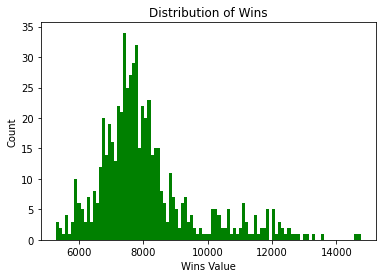

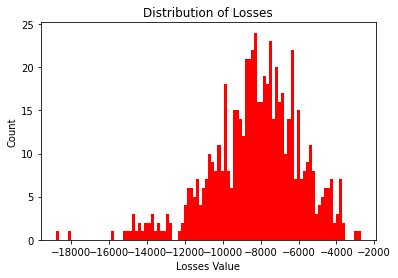

In [242]:
#create histogram for wins
plt.hist(final["tot_win"], bins=100, color="green")
plt.title("Distribution of Wins")
plt.xlabel("Wins Value")
plt.ylabel("Count")
plt.show()

#create histogram for losses
plt.hist(final["tot_los"], bins=100, color="red")
plt.title("Distribution of Losses")
plt.xlabel("Losses Value")
plt.ylabel("Count")
plt.show()


We can see wins has a right skew distribution with a small number of subjects with wins above 10,000. The losses is similarly distributed but with a left skew distribution. The presence of trials of length 150 in this data alongside the data of trials with length 95/100 would be partly the cause of this.

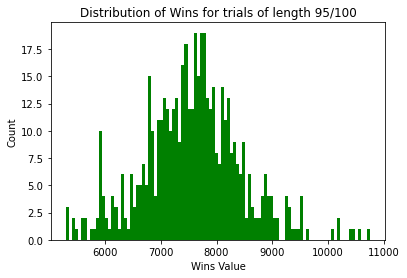

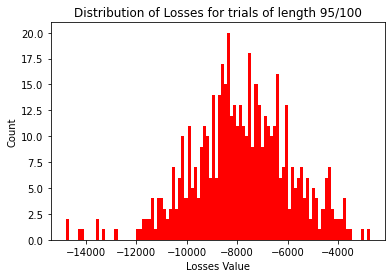

Deck_A      Deck_B      Deck_C      Deck_D       tot_win  \
count  519.000000  519.000000  519.000000  519.000000    519.000000   
mean    15.132948   30.901734   23.354528   30.466281   7575.211946   
std      7.125167   13.933238   14.957389   14.430446    881.667949   
min      1.000000    1.000000    1.000000    1.000000   5300.000000   
25%     10.000000   22.000000   13.000000   21.000000   7045.000000   
50%     15.000000   30.000000   20.000000   28.000000   7600.000000   
75%     20.000000   39.000000   28.000000   38.000000   8100.000000   
max     38.000000   79.000000   84.000000   92.000000  10750.000000   

            tot_los        Subj   Unique_ID      balance      Payoff  
count    519.000000  519.000000  519.000000   519.000000  519.000000  
mean   -7832.080925  245.433526  260.000000  -256.868979    2.206166  
std     1960.716200  149.256183  149.966663  1169.048170    0.715170  
min   -14800.000000    1.000000    1.000000 -4250.000000    1.000000  
25%    -9012.500000  115.500000  130.500000 -1032.500000    2.000000  
50%    -7800.000000  245.000000  260.000000  -300.000000    2.000000  
75%    -6512.500000  374.500000  389.500000   550.000000    3.000000  
max    -2725.000000  504.000000  519.000000  3570.000000    3.000000

In [243]:
#create histogram for wins

to_keep= ['Fridberg','Horstmann','Kjome','Maia','SteingroverInPrep','Premkumar','Wood','Worthy']
filtered_df = final[final['Study'].isin(to_keep)]
plt.hist(filtered_df["tot_win"], bins=100, color="green")
plt.title("Distribution of Wins for trials of length 95/100")
plt.xlabel("Wins Value")
plt.ylabel("Count")
plt.show()

#create histogram for losses
plt.hist(filtered_df["tot_los"], bins=100, color="red")
plt.title("Distribution of Losses for trials of length 95/100")
plt.xlabel("Losses Value")
plt.ylabel("Count")
plt.show()

filtered_df.describe()

We can see once we remove the trials of length 150 the level of right skew in the wins histogram reduces as does the level of left skew in the losses histogram.

 ## Analysis by Payoff

We now look at the distribution of the balance across the different payoff schemes.

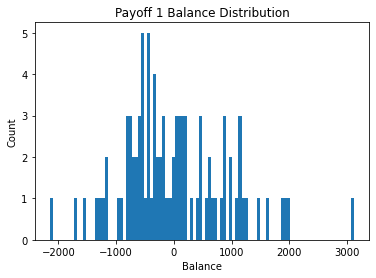

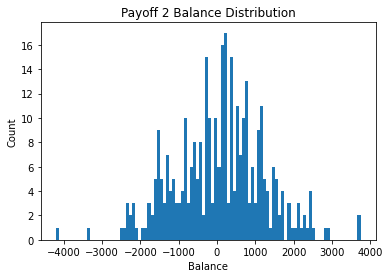

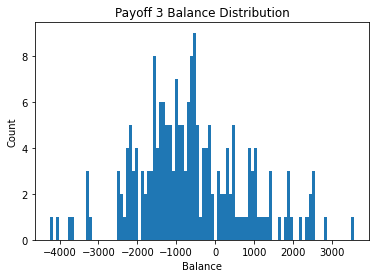

In [244]:
i = 1
while i < 4:
    pay1 = final['Payoff'] == i
    temp = final[pay1]
    plt.hist(temp['balance'], bins = 100)
    plt.title("Payoff "+ str(i) + " Balance Distribution")
    plt.xlabel("Balance")
    plt.ylabel('Count')
    plt.show()
    i += 1
    temp.describe()

We can see payoff 2 has distribution that centers just above 0 while payoff 1 and 3 have a negative center - payoff 3 showing the worst results. This may be due to the sharp increase in penalty that occurs with every 10 cards chosen in payoff 3.

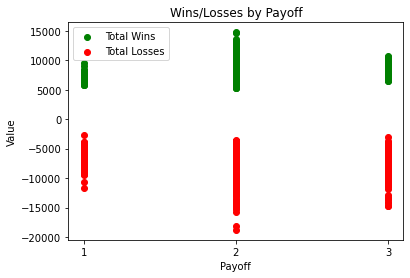

In [245]:
#Show wins and losses by Payoff
plt.scatter(final["Payoff"], final["tot_win"], label = "Total Wins", color="g")
plt.scatter(final["Payoff"], final["tot_los"], label = "Total Losses", color="r")

plt.legend(ncol=1, loc='upper left')
plt.title("Wins/Losses by Payoff")
plt.xlabel("Payoff")
plt.ylabel("Value")
plt.xticks([1, 2, 3])
plt.show()

Payoff 2 shows the widest distribution across wins and losses while payoff 3 again shows a very tight distribution of wins but a wide variety of losses due to this evolving reward/punishment system every 10 cards.

## Analysis by Study

Another theory we have is that the study in which the subject is part of may affect the participants results. We will explore this data with each study in miond to see if any obvious trends emerge. This may also be a useful clustering excercise to see if subjects will cluster with others in their study

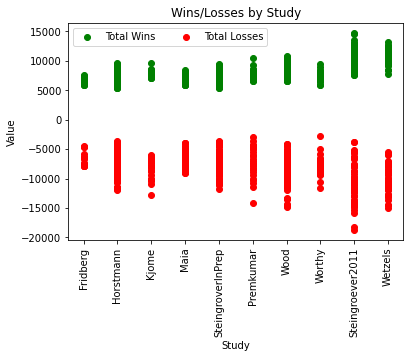

In [246]:
#Show wins and losses by Study
plt.scatter(final["Study"], final["tot_win"], label = "Total Wins", color="g")
plt.scatter(final["Study"], final["tot_los"], label = "Total Losses", color="r")

plt.xticks(rotation=90)
plt.legend(ncol=2)
plt.title("Wins/Losses by Study")
plt.xlabel("Study")
plt.ylabel("Value")
plt.show()

Steingroever2011 and Wetzels, as the only studies with trials of length 150, show the greatest variety in wins and losses across their participants. The Fridberg study group shows limited wins but limited losses also. This group has 15 participants so this may be a factor although Kjome shows a wider variety of wins and losses with 19 participants.  

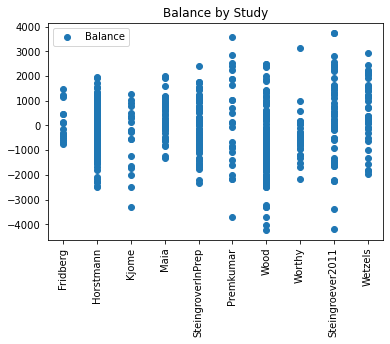

In [247]:
#show balance by study
plt.scatter(final["Study"], final["balance"], label = "Balance")
plt.xticks(rotation=90)
plt.legend()
plt.title("Balance by Study")
plt.show()

Steingroever2011, Wood and Premkumar show the widest variety in terms of positive and negative balance of its participants. Fridberg and Kjome again vary despite their similar small group size. We can also see that the two participants from Steingroever2011 which chose deck 3 150 times had the greatest profit of 3,750 amongst all participants.

## Analysis of deck choices

One of the features we have included in our dataframe is the number of choices of each deck. We know there are good decks and bad decks with varying rewards and punishments so this will definitely be a feature that will affect our clustering algorithm.

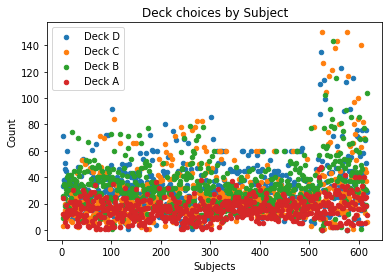

In [248]:
plt.scatter(final["Unique_ID"], final['Deck_D'], label = "Deck D", s=20)
plt.scatter(final["Unique_ID"], final['Deck_C'], label = "Deck C", s=20)
plt.scatter(final["Unique_ID"], final['Deck_B'], label = "Deck B", s=20)
plt.scatter(final["Unique_ID"], final['Deck_A'], label = "Deck A", s=20)


plt.title("Deck choices by Subject")
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.legend()
plt.show()

We can see above the tendency of participants to choice Decks 2/3/4 more than 60 times where deck 1 was never chosen this many times by any participant. We can also see the trend of a number of participants who have chose the same deck close to 100% of the trials. The large increase in choices from Subject 500 onwards is due to the trials of length 150.

There seems to be a unnatural distribution of choices between subjects 300-480 with a consistent number of choices being exactly 60. We will explore this data in more detail:

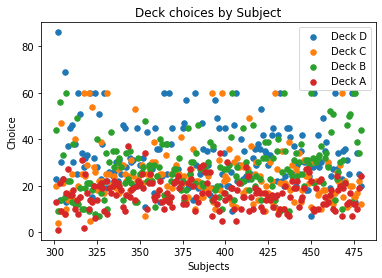

In [249]:
filter1 = final["Unique_ID"]>300
filter2 = final["Unique_ID"]<480
final_zoom = final.where(filter1&filter2, inplace=False)
plt.scatter(final_zoom["Unique_ID"], final_zoom['Deck_D'], label = "Deck D", s=30)
plt.scatter(final_zoom["Unique_ID"], final_zoom['Deck_C'], label = "Deck C", s=30)
plt.scatter(final_zoom["Unique_ID"], final_zoom['Deck_B'], label = "Deck B", s=30)
plt.scatter(final_zoom["Unique_ID"], final_zoom['Deck_A'], label = "Deck A", s=30)

plt.title("Deck choices by Subject")
plt.xlabel("Subjects")
plt.ylabel("Choice")
plt.legend()
plt.show()

Further inspection on a subset of participants shows an unusual trend to choose a specific deck exactly 60 times. This is across decks 2/3/4 but again deck 1 is neglected in this. This may have been a stipulation of the study that no deck was allowed to be chosen more than 60 times.

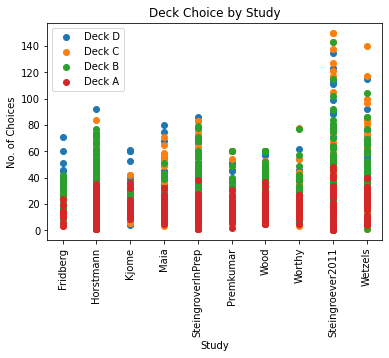

In [251]:
plt.scatter(final["Study"], final['Deck_D'], label = "Deck D")
plt.scatter(final["Study"], final['Deck_C'], label = "Deck C")
plt.scatter(final["Study"], final['Deck_B'], label = "Deck B")
plt.scatter(final["Study"], final['Deck_A'], label = "Deck A")
plt.xticks(rotation=90)
plt.legend()
plt.title("Deck Choice by Study")
plt.xlabel("Study")
plt.ylabel("No. of Choices")
plt.show()

Steingroever2011 had the two most successful participants and also had the two highest choices of a single deck with two members selecting deck C 150/150 trials. There were also a number of other participants who chose a single deck more than 100 times in their study.

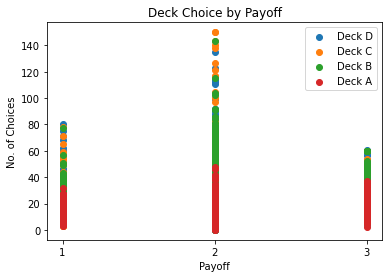

In [253]:
plt.scatter(final["Payoff"], final['Deck_D'], label = "Deck D")
plt.scatter(final["Payoff"], final['Deck_C'], label = "Deck C")
plt.scatter(final["Payoff"], final['Deck_B'], label = "Deck B")
plt.scatter(final["Payoff"], final['Deck_A'], label = "Deck A")
plt.legend()
plt.xticks([1, 2, 3])
plt.title("Deck Choice by Payoff")
plt.xlabel("Payoff")
plt.ylabel("No. of Choices")
plt.show()

Interestingly payoff 2 shows a much higher selection of choices compared to payoff 1 or payoff 3. The distribution across these three is clearly quite different and so it will be interesting to see if clustering will indicate this also.